# Import data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [46]:
df = pd.read_csv('Graduate.csv')
df

,Unnamed: 0,SerialNo,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,0,1,337,118,Very Good,4.50,4.50,9.65,1,0.92
1,1,2,324,107,Very Good,4.00,4.50,8.87,1,0.76
2,2,3,316,104,Good,3.00,3.50,8.00,1,0.72
3,3,4,322,110,Good,3.50,2.50,8.67,1,0.80
4,4,5,314,103,Fair,2.00,3.00,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...,...
190,190,191,324,111,Excellent,4.50,4.00,9.16,1,0.90
191,191,192,323,110,Excellent,4.00,5.00,8.98,1,0.87
192,192,193,322,114,Excellent,4.50,4.00,8.94,1,0.86
193,193,194,336,118,Excellent,4.50,5.00,9.53,1,0.94


In [47]:
df.drop(['Unnamed: 0', 'SerialNo'], axis = 1, inplace = True)
df

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,Very Good,4.50,4.50,9.65,1,0.92
1,324,107,Very Good,4.00,4.50,8.87,1,0.76
2,316,104,Good,3.00,3.50,8.00,1,0.72
3,322,110,Good,3.50,2.50,8.67,1,0.80
4,314,103,Fair,2.00,3.00,8.21,0,0.65
...,...,...,...,...,...,...,...,...
190,324,111,Excellent,4.50,4.00,9.16,1,0.90
191,323,110,Excellent,4.00,5.00,8.98,1,0.87
192,322,114,Excellent,4.50,4.00,8.94,1,0.86
193,336,118,Excellent,4.50,5.00,9.53,1,0.94


# Normality Test

Library scipy menyediakan berbagai macam fungsi statistik yang dapat digunakan layaknya pada R (seperti uji statistik, perhitungan densitas, variabel random ,dsb).
Di luar itu, scipy juga menyediakan banyak fungsi matematis yang sering digunakan, khususnya dalam aljabar linear.

Informasi lebih lanjut dapat dilihat melalui https://docs.scipy.org/doc/scipy/reference/stats.html

In [48]:
from scipy import stats

#### Kolmogorov-Smirnov test

In [49]:
stats.kstest(df["ChanceofAdmit"], 'norm')

KstestResult(statistic=0.6422444526389299, pvalue=7.932818634874178e-79, statistic_location=0.42, statistic_sign=-1)

Karena nilai sig. = 0.000 <  0.05 = α. Maka H0 ditolak. Artinya data variabel dependen (ChanceofAdmit) diambil dari populasi yang tidak berdistribusi normal. Jadi asumsi normalitas data dependen untuk melakukan uji regresi linear berganda tidak terpenuhi. Sehingga data variabel dependen tidak dapat digunakan untuk melakukan pengujian lebuh lanjut. namun untuk keperluan lebih lanjut maka kita asumsikan berdistribusi normal.

# Linearitas

#### Dilihat dari scatterplot

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

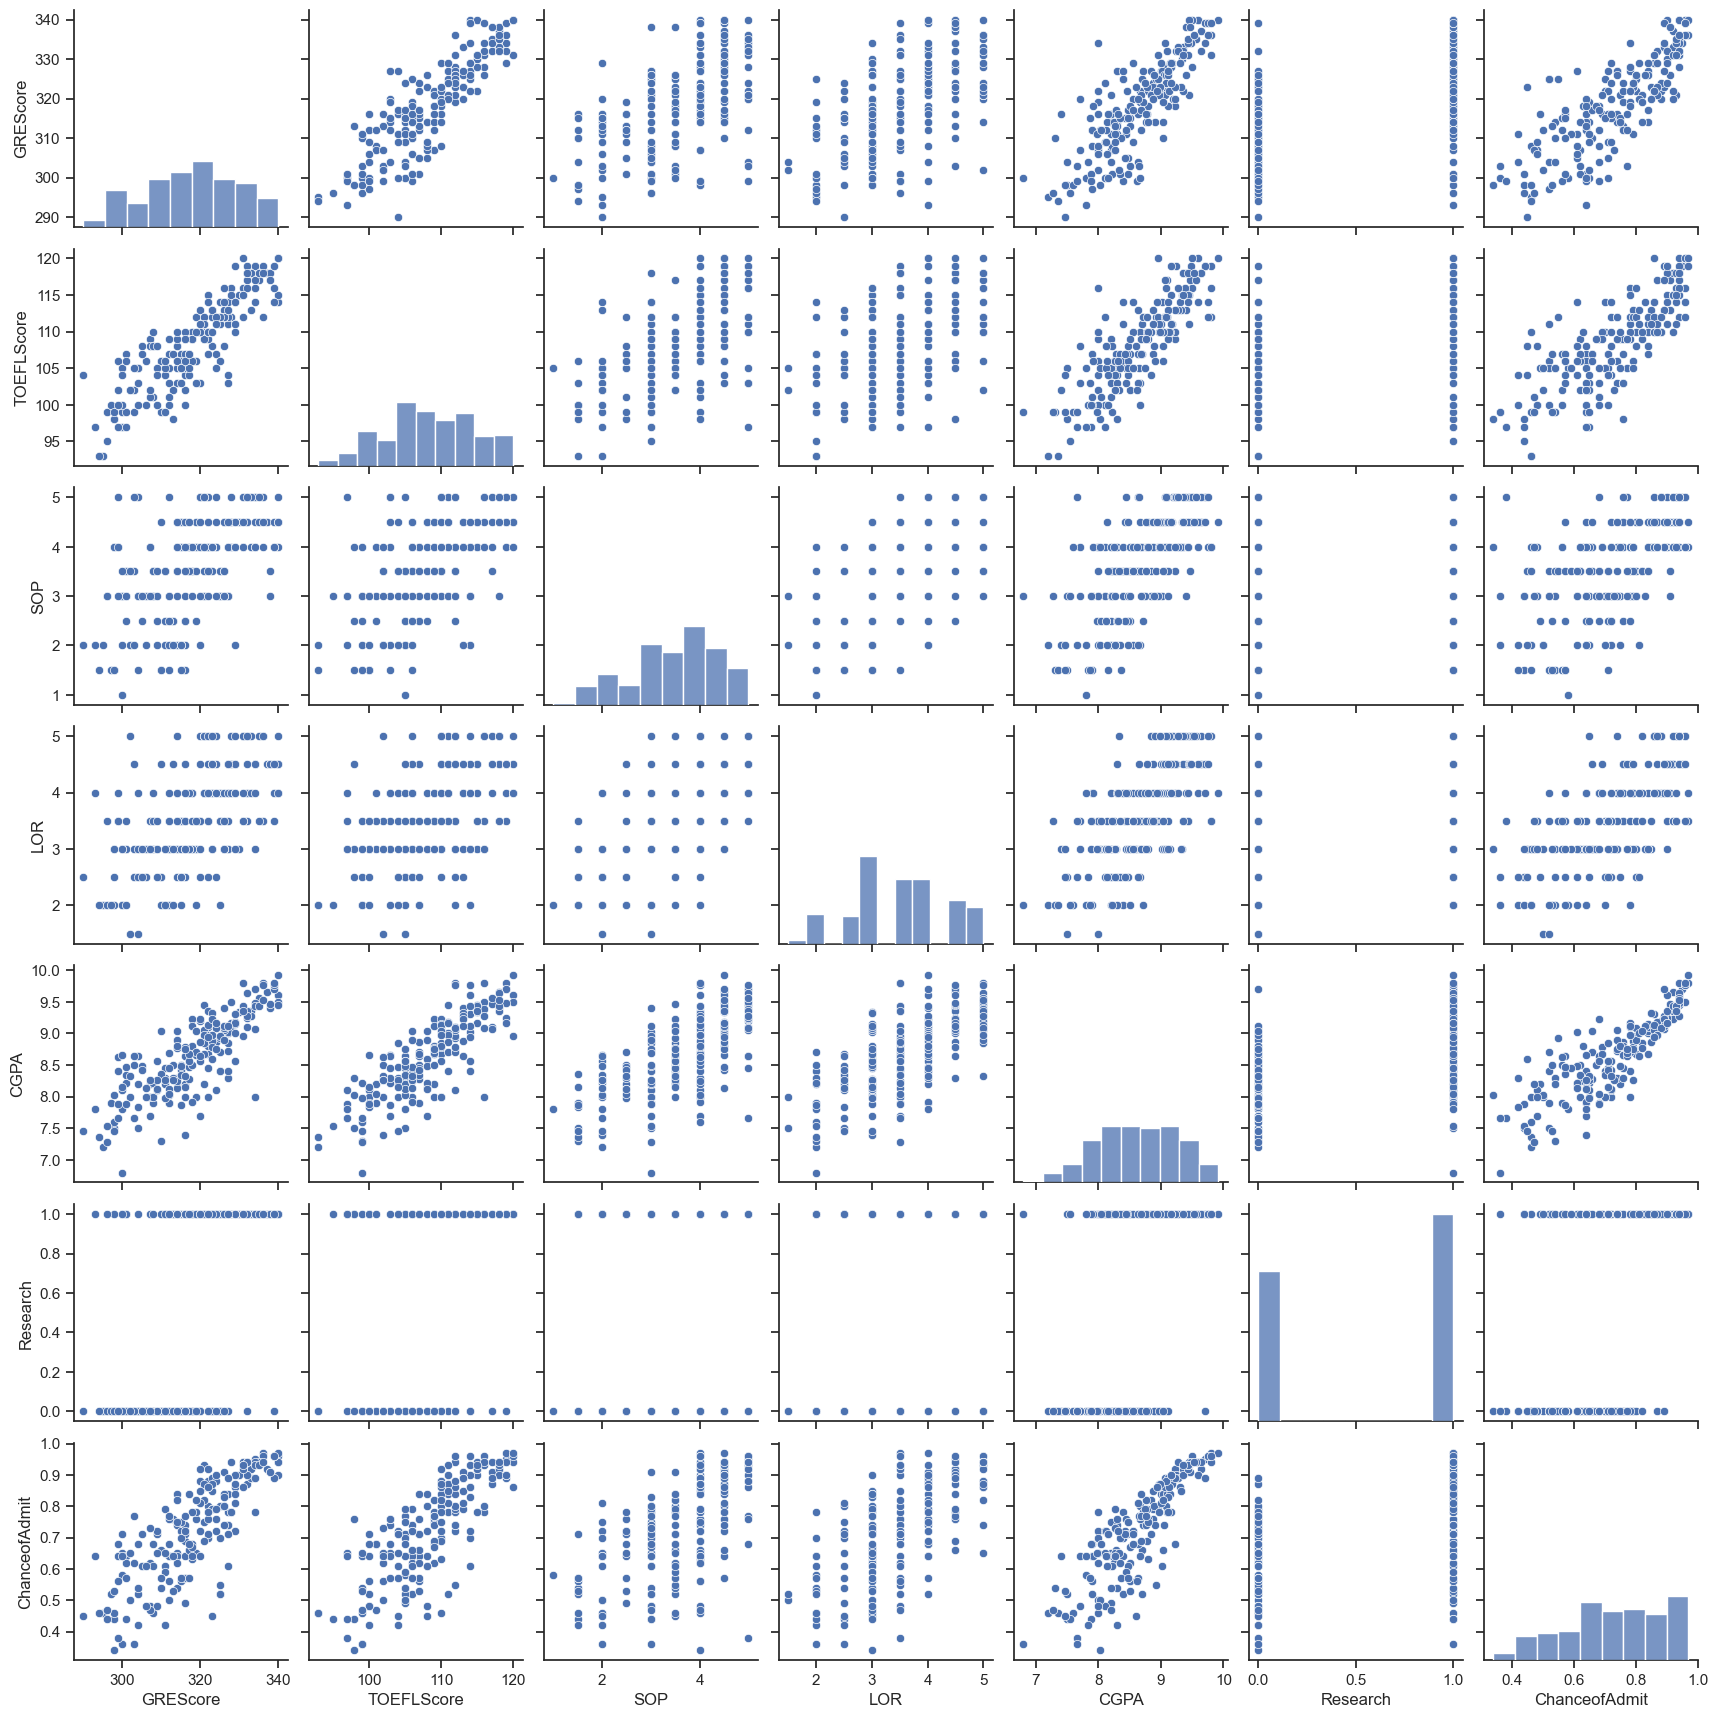

In [51]:
sns.set_theme(style="ticks")
sns.pairplot(df)

# Linear Regression

#### Make Dummies Variable

In [52]:
dummy = pd.get_dummies(df[['UniversityRating']])
dummy

,UniversityRating_Excellent,UniversityRating_Fair,UniversityRating_Good,UniversityRating_Poor,UniversityRating_Very Good
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
190,1,0,0,0,0
191,1,0,0,0,0
192,1,0,0,0,0
193,1,0,0,0,0


In [ ]:
poor = 1
fair = 2

In [ ]:
jenis kelamin = cowo cewe tidak diketahui batman

In [53]:
df_dummy = pd.concat([df.drop('UniversityRating', axis = 1), dummy], axis = 1)
df_dummy

,GREScore,TOEFLScore,SOP,LOR,CGPA,Research,ChanceofAdmit,UniversityRating_Excellent,UniversityRating_Fair,UniversityRating_Good,UniversityRating_Poor,UniversityRating_Very Good
0,337,118,4.50,4.50,9.65,1,0.92,0,0,0,0,1
1,324,107,4.00,4.50,8.87,1,0.76,0,0,0,0,1
2,316,104,3.00,3.50,8.00,1,0.72,0,0,1,0,0
3,322,110,3.50,2.50,8.67,1,0.80,0,0,1,0,0
4,314,103,2.00,3.00,8.21,0,0.65,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
190,324,111,4.50,4.00,9.16,1,0.90,1,0,0,0,0
191,323,110,4.00,5.00,8.98,1,0.87,1,0,0,0,0
192,322,114,4.50,4.00,8.94,1,0.86,1,0,0,0,0
193,336,118,4.50,5.00,9.53,1,0.94,1,0,0,0,0


In [90]:
df_dummy['score'] = df_dummy['GREScore'] + df_dummy['TOEFLScore']
df_dummy

,GREScore,TOEFLScore,SOP,LOR,CGPA,Research,ChanceofAdmit,UniversityRating_Excellent,UniversityRating_Fair,UniversityRating_Good,UniversityRating_Poor,UniversityRating_Very Good,score
0,337,118,4.50,4.50,9.65,1,0.92,0,0,0,0,1,455
1,324,107,4.00,4.50,8.87,1,0.76,0,0,0,0,1,431
2,316,104,3.00,3.50,8.00,1,0.72,0,0,1,0,0,420
3,322,110,3.50,2.50,8.67,1,0.80,0,0,1,0,0,432
4,314,103,2.00,3.00,8.21,0,0.65,0,1,0,0,0,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,324,111,4.50,4.00,9.16,1,0.90,1,0,0,0,0,435
191,323,110,4.00,5.00,8.98,1,0.87,1,0,0,0,0,433
192,322,114,4.50,4.00,8.94,1,0.86,1,0,0,0,0,436
193,336,118,4.50,5.00,9.53,1,0.94,1,0,0,0,0,454


#### Begin Multiple Linear Regression

Dalam contoh ini, ditunjukkan regresi linear menggunakan library statsmodel. Library ini cukup mudah untuk digunakan dalam analisis regresi klasik (yang pernah ditemukan dalam kelas teori).

In [54]:
import statsmodels.api as sm

# Model 1 - All variables

#### make variable x & y

In [55]:
X = df_dummy.drop('ChanceofAdmit', axis = 1)
y = df_dummy['ChanceofAdmit']

#### add constant for x

Ketika menggunakan statsmodels, kita perlu menambahkan konstanta secara manual.

In [56]:
X = sm.add_constant(X)

#### Create a model and fit it

Ini adalah konsep yang akan umum dijumpai ketika bermain dengan model, dimana kita perlu mendefinisikan sebuah model (sm.OLS) dan melakukan fitting. Model yang tidak di fit tidak dapat digunakan karena belum berisikan informasi apapun yang diambil dari data.

In [57]:
model1 = sm.OLS(y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     69.98
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           2.63e-57
Time:                        07:52:21   Log-Likelihood:                 236.52
No. Observations:                 195   AIC:                            -451.0
Df Residuals:                     184   BIC:                            -415.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [58]:
model1.aic

-451.04642991852825

# Model 2 - Tanpa SOP

In [59]:
X.drop('SOP', axis = 1, inplace = True)

In [60]:
model2 = sm.OLS(y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     77.84
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           3.94e-58
Time:                        07:52:21   Log-Likelihood:                 236.19
No. Observations:                 195   AIC:                            -452.4
Df Residuals:                     185   BIC:                            -419.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Model 3 - Tanpa SOP dan TOEFLScore

In [61]:
X.drop('TOEFLScore', axis = 1, inplace = True)

In [62]:
model3 = sm.OLS(y, X).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     86.18
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.93e-58
Time:                        07:52:21   Log-Likelihood:                 234.54
No. Observations:                 195   AIC:                            -451.1
Df Residuals:                     186   BIC:                            -421.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [63]:
best_model = {
    'R2' : [model1.rsquared, model2.rsquared, model3.rsquared],
    'Adj R2' : [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj],
    'SE' : [model1.scale, model2.scale, model3.scale],
    'AIC' : [model1.aic, model2.aic, model3.aic],
    'BIC' : [model1.bic, model2.bic, model3.bic]
    }

In [64]:
print(pd.DataFrame(best_model))

    R2  Adj R2   SE     AIC     BIC
0 0.79    0.78 0.01 -451.05 -415.04
1 0.79    0.78 0.01 -452.38 -419.65
2 0.79    0.78 0.01 -451.08 -421.62


Model terbaik adalah model ke-2 karena memenuhi 3/5 kriteria

# Diagnostic Checking pada Model ke 2
1. Fix independen variabel: diasumsikan
terpenuhi
2. Linearitas dependen dengan independen
Untuk mengetahui ada tidaknya hubungan
linear antara variabel independen dengan
variabel dependen.
3. Normalitas residual
Untuk mengetahui residual berdistribusi
normal atau tidak
4. Homoskedastisitas
Kondisi dimana variansi konstan. Terpenuhi
jika variansi residual konstan, dilihat dari plot
z resid by z pred.
Dikatakan homoskedastisitas jika titik-titik
mendekati nol dan tidak membentuk pola.
5. No multikolinearitas
Kondisi dimana tidak ada hubungan antar
variabel independen. Terpenuhi jika VIF< 10
dan TOL > 0,1 (lihat di tabel coefficients)
6. No autokorelasi
Kondisi dimana tidak ada korelasi antar eror.

In [65]:
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

## Linearitas

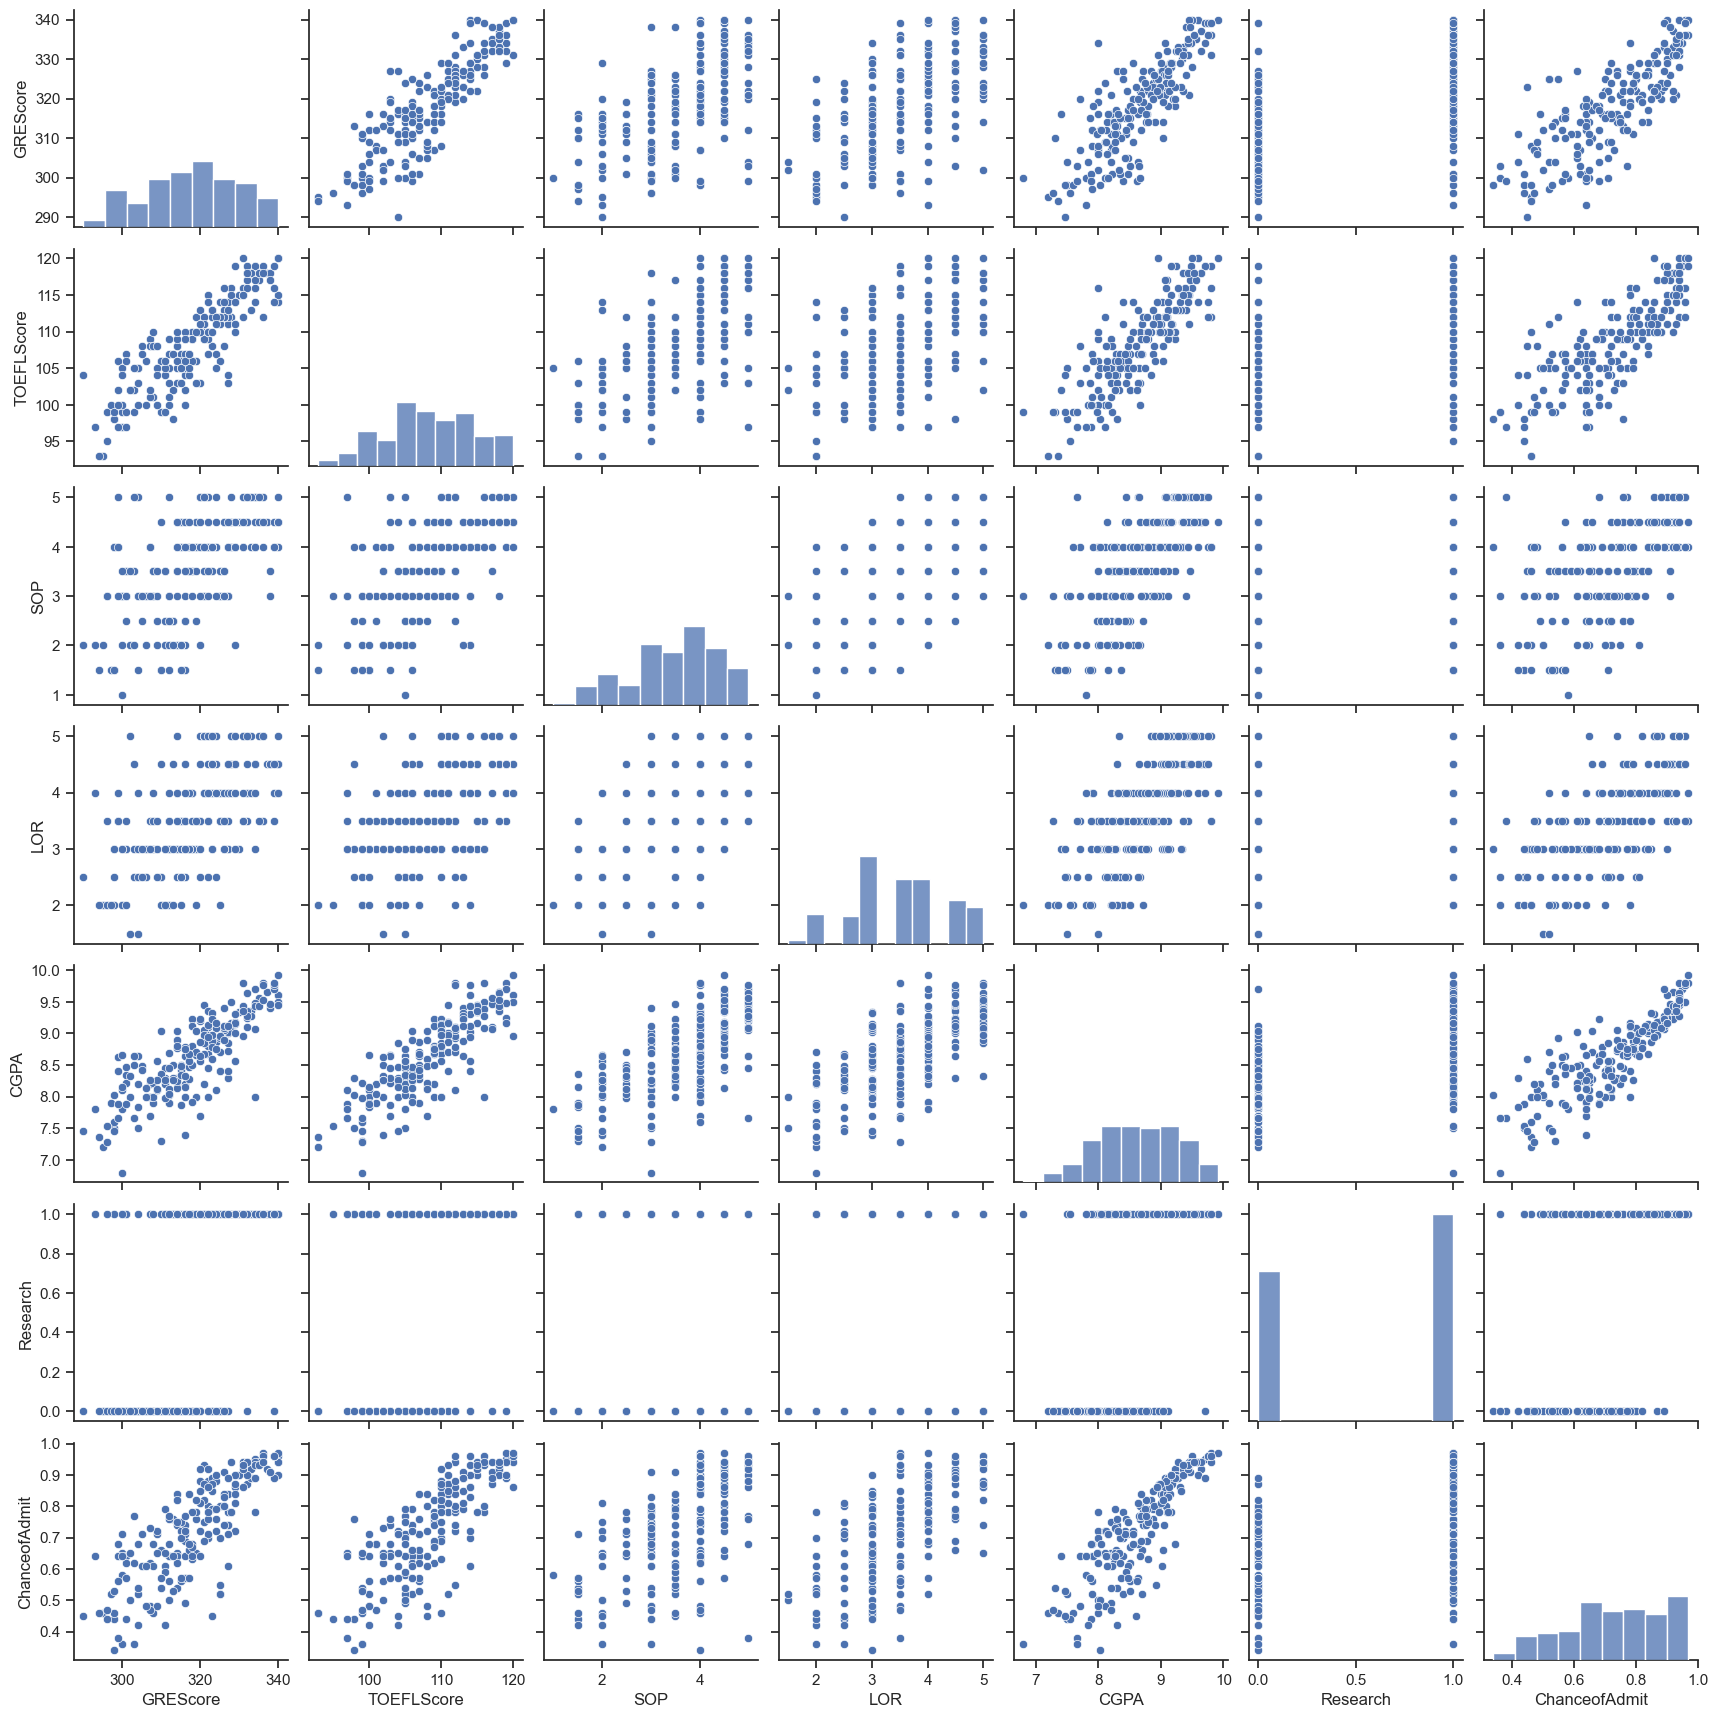

In [66]:
# Linearitas
sb.pairplot(df)


## Normalitas Residual

In [67]:
#Normalitas Residual

'''
H0  : Residuals are normally distributed
H1  : Residuals are not normally distributed
Rejet H0 if P-Value < alpha = 0,05
'''
alpha = 0.05
name = ['Chi^2', 'Two-tail probability']
normtest = sm.stats.omni_normtest(model2.resid)
print(normtest,'\n')

if normtest.pvalue < 0.05 :
  print('Pvalue < 0.05, H0 ditolak, Residual tidak berdistribusi normal')
else  :
  print ('Pvalue > 0.05, H0 tidak ditolak, Residual  berdistribusi normal')

NormaltestResult(statistic=21.476626163812647, pvalue=2.169750931954884e-05) 

Pvalue < 0.05, H0 ditolak, Residual tidak berdistribusi normal


## Homoskedastisitas

In [68]:
bp_test = het_breuschpagan(model2.resid, X)
print("Breusch-Pagan test p-value:", bp_test[1])

Breusch-Pagan test p-value: 0.0016600151856724658


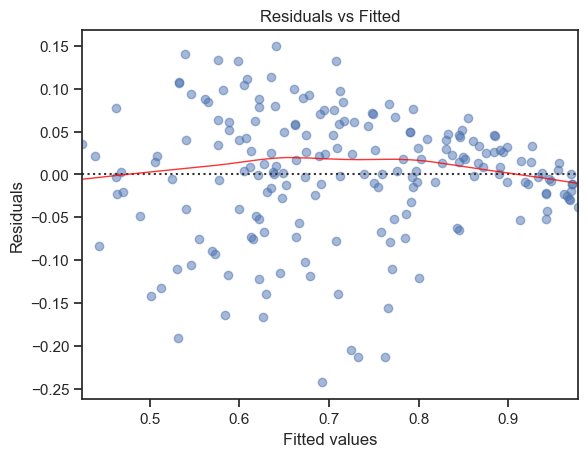

In [69]:
#Homoskedastistas
'''
H0  : Terdapat homoskedastisitas (residu terdistribusi dengan varian yang sama)
H1  : Terdapat heteroskedastisitas (residu tidak terdistribusi dengan varian yang sama)
H0 ditolak jika P-Value < alpha = 0,05
'''

# fitted values
model_fitted_y = model2.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='ChanceofAdmit', data=df_dummy, lowess=True,
                     scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

## Autokorelasi

*   If the value of durbin_watson  = 2, it implies no autocorrelation
*   If the value of durbin_watson lies between  0 and 2, it implies positive autocorrelation.
*   If the value of durbin_watson lies between  2 and 4, it implies negative autocorrelation.

In [70]:
dw_test = durbin_watson(model2.resid)
print("Durbin-Watson test statistic:", dw_test)

Durbin-Watson test statistic: 0.6829977877435789


## Multikolinearitas

In [84]:
#No multikolinearitas
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_dummy[["GREScore","TOEFLScore","LOR","CGPA","Research","UniversityRating_Excellent","UniversityRating_Fair","UniversityRating_Good", "UniversityRating_Poor", "UniversityRating_Very Good"]].columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_dummy[["GREScore","TOEFLScore","LOR","CGPA","Research","UniversityRating_Excellent","UniversityRating_Fair","UniversityRating_Good", "UniversityRating_Poor", "UniversityRating_Very Good"]].values, i)
                          for i in range(len(df_dummy[["GREScore","TOEFLScore","LOR","CGPA","Research","UniversityRating_Excellent","UniversityRating_Fair","UniversityRating_Good", "UniversityRating_Poor", "UniversityRating_Very Good"]].columns))]

print(vif_data)

print('\nDapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi')

                      feature    VIF
0                    GREScore   4.73
1                  TOEFLScore   5.11
2                         LOR   2.10
3                        CGPA   4.91
4                    Research   1.40
5  UniversityRating_Excellent 311.39
6       UniversityRating_Fair 295.30
7       UniversityRating_Good 427.43
8       UniversityRating_Poor  66.07
9  UniversityRating_Very Good 257.04

Dapat disimpulkan bahwa asumsi No Multikolinearitas tidak terpenuhi


# Other Regression Algorithm

Selain metode regresi konvensional seperti yang sudah ada di atas, terdapat beberapa metode regresi lain dalam Machine Learning. Salah satu contoh metode yang sering digunakan adalah metode boosting.

In [72]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

from sklearn.metrics import r2_score

In [91]:
data = df_dummy.drop(['ChanceofAdmit', 'Research', 'score'], axis = 1)
data

,GREScore,TOEFLScore,SOP,LOR,CGPA,UniversityRating_Excellent,UniversityRating_Fair,UniversityRating_Good,UniversityRating_Poor,UniversityRating_Very Good
0,337,118,4.50,4.50,9.65,0,0,0,0,1
1,324,107,4.00,4.50,8.87,0,0,0,0,1
2,316,104,3.00,3.50,8.00,0,0,1,0,0
3,322,110,3.50,2.50,8.67,0,0,1,0,0
4,314,103,2.00,3.00,8.21,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
190,324,111,4.50,4.00,9.16,1,0,0,0,0
191,323,110,4.00,5.00,8.98,1,0,0,0,0
192,322,114,4.50,4.00,8.94,1,0,0,0,0
193,336,118,4.50,5.00,9.53,1,0,0,0,0


In [74]:
y

0     0.92
1     0.76
2     0.72
3     0.80
4     0.65
      ... 
190   0.90
191   0.87
192   0.86
193   0.94
194   0.77
Name: ChanceofAdmit, Length: 195, dtype: float64

# Gradient Boosting Model

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = 26)

In [93]:
reg = GradientBoostingRegressor()

reg.fit(X_train, y_train)
y_pred = pd.DataFrame(reg.predict(X_test), columns = ['Y_hat'])

y_pred.head(10)

,Y_hat
0,0.80
1,0.76
2,0.57
3,0.94
4,0.68
5,0.85
6,0.64
7,0.62
8,0.66
9,0.94


In [94]:
r2_score(y_test, y_pred)

0.631880971003838

# Feature Importance

Mendapatkan nilai akan seberapa penting / berpengaruhnya variabel terhadap model

In [78]:
feature_importance = pd.DataFrame(
    {'Feature' : reg.feature_names_in_, 'Importance': reg.feature_importances_}
)

feature_importance.sort_values('Importance', ascending = False)

,Feature,Importance
4,CGPA,0.75
1,TOEFLScore,0.09
0,GREScore,0.09
3,LOR,0.03
2,SOP,0.02
8,UniversityRating_Good,0.02
7,UniversityRating_Fair,0.00
5,Research,0.00
6,UniversityRating_Excellent,0.00
10,UniversityRating_Very Good,0.00


<Axes: xlabel='Importance', ylabel='Feature'>

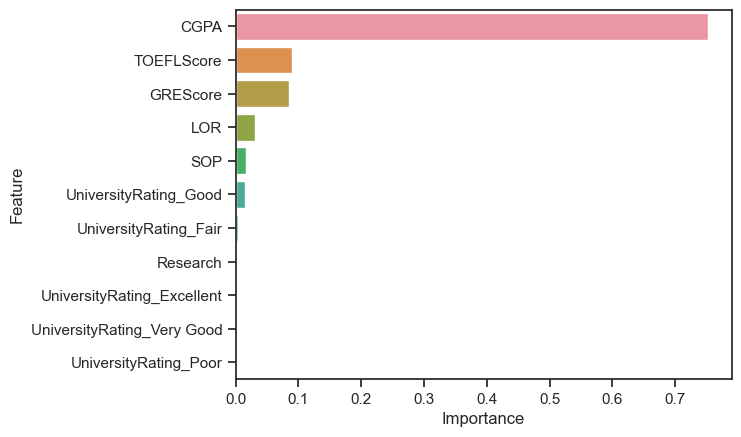

In [79]:
sns.barplot(feature_importance.sort_values('Importance', ascending = False), y = 'Feature', x = 'Importance')

# All Boosting Model with R^2 Score Evaluation

In [80]:
algorithm = [AdaBoostRegressor(random_state = 26), 
         ExtraTreesRegressor(random_state = 26),
         RandomForestRegressor(random_state = 26), 
         GradientBoostingRegressor(random_state = 26), 
         HistGradientBoostingRegressor(random_state = 26)
         ]

In [81]:
result = []

for model in algorithm:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    nilai = {
        'Model' : type(model).__name__,
        'Nilai R2' : r2
    }

    result.append(nilai)

In [82]:
result = pd.DataFrame(result)
result

,Model,Nilai R2
0,AdaBoostRegressor,0.65
1,ExtraTreesRegressor,0.66
2,RandomForestRegressor,0.65
3,GradientBoostingRegressor,0.62
4,HistGradientBoostingRegressor,0.68


In [83]:
result.sort_values('Nilai R2', ascending = False)

,Model,Nilai R2
4,HistGradientBoostingRegressor,0.68
1,ExtraTreesRegressor,0.66
0,AdaBoostRegressor,0.65
2,RandomForestRegressor,0.65
3,GradientBoostingRegressor,0.62


In [86]:
from lazypredict.Supervised import LazyRegressor

In [87]:
reg = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 57%|█████▋    | 24/42 [00:06<00:02,  7.16it/s]C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 71%|███████▏  | 30/42 [00:07<00:01,  8.05it/s]C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(
100%|██████████| 42/42 [00:12<00:00,  3.39it/s]


In [88]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LarsCV,0.66,0.74,0.07,0.10
LassoCV,0.66,0.73,0.07,0.14
LassoLarsCV,0.66,0.73,0.07,0.08
ElasticNetCV,0.66,0.73,0.07,0.21
LassoLarsIC,0.65,0.73,0.07,0.08
HuberRegressor,0.64,0.73,0.08,0.06
RidgeCV,0.64,0.72,0.08,0.06
BayesianRidge,0.64,0.72,0.08,0.13
Ridge,0.64,0.72,0.08,0.04
